<a href="https://colab.research.google.com/github/divaamahajan/DataMining/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Kaggle to import DB**

In [ ]:
!pip install -q kaggle
!pip install plotly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Loading the Libraries and Data**


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

# **Import data directly from kaggle to the colab notebook**
**PreRequisite:**
1. Go to your kaggle account, 
2. Scroll to API section 
3. Click Expire API Token to remove previous tokens. 
4. Click on Create New API Token - It will download kaggle. json file on your machine.



In [ ]:
from google.colab import files

# Upload the kaggle.json file that you downloaded in prereq
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"divyaamahajan","key":"0e5eb92c4aae7fd411f408cd68f5a1fc"}'}

In [ ]:
#Make directory name kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle'

In [ ]:
# Download and extract the dataset
!kaggle competitions download -c spaceship-titanic -p /content
!unzip -q /content/spaceship-titanic.zip -d /content/spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 66.4MB/s]


#**Global Functions and Values**

In [ ]:
# Function to return metrics
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

def get_model_metrics(model_name, y_true, y_pred):
    metrics = {}
    metrics['Model'] = model_name
    metrics['Accuracy'] = accuracy_score(y_true, y_pred)
    metrics['AUC'] = roc_auc_score(y_true, y_pred)
    metrics['Precision'] = precision_score(y_true, y_pred)
    metrics['Recall'] = recall_score(y_true, y_pred)
    metrics['F1'] = f1_score(y_true, y_pred)
    metrics['Kappa'] = cohen_kappa_score(y_true, y_pred)
    metrics['MCC'] = matthews_corrcoef(y_true, y_pred)
    
    return metrics


In [ ]:
#list to metrics of all tables
metrics_table = list()

# **Load Dataset**

**Primary object types:**
- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column


**Get dataframe**: 
Read CSV file from the 'data' subdirectory using a relative path.
*  `head() `will print the first 5 rows of the dataframe
*  `tail()` will print the last 5 rows) of the dataframe




In [ ]:
# reading the XLSX file
file_train =('/content/spaceship-titanic/train.csv')
file_test =('/content/spaceship-titanic/test.csv')
df = pd.read_csv(file_train)
df_test = pd.read_csv(file_test)
df_test_copy = df_test # to secure the origibal data
  
# displaying the contents of the XLSX file
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
#check the shape(rowz X cols) of data
df.shape

(8693, 14)

**Observation** : We have a data with 8693 rows and 14 columns

# **Data Preprocessing**

##**Importance of Data Preprocessing stage**
1. Different ML models have different required input data (numerical data, images in specific format, etc). Without the right data, nothing will work.
2. Because of “bad” data, ML models will not give any useful results, or even may give wrong answers, that may lead to wrong decisions (GIGO principle).
3. The higher the quality of the data, the less data is needed.



**Stages of Data preprocessing**
1.  Data Cleaning
>* Removing duplicates
>* Removing irrelevant observations and errors
>* Removing unnecessary columns
>* Handling inconsistent data
>* Handling outliers and noise
2. Handling missing data

3. Data Integration

4. Data Transformation
>* Feature Construction
>* Handling skewness
>* Data Scaling
5. Data Reduction
>* Removing dependent (highly correlated) variables
>* Feature selection
>* PCA

## **Data Cleaning**

**Removing duplicates**

In [ ]:
df = df.drop_duplicates()
print(df.shape)

(8693, 14)


**Observation** : We still have a data with 8693 rows and 14 columns. Therefore, no duplicates found


**Changing the Index of a DataFrame**

A pandas Index enhances the capabilities of NumPy arrays to enable more flexible slicing and labeling. In many situations, it is advantageous to utilize the data's uniquely valued identifying field as its index, such as ID.

In [ ]:
# check if the selected column is unique
if df['PassengerId'].is_unique: 
  # if true then update
  df = df.set_index('PassengerId')
  df_test = df_test.set_index('PassengerId')

In [ ]:
# Print the dataframe
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Observation** : PassengerId is 100% unique and updated to be index

## **Data Transformation Part I**

###Splitting Columns based of Values

**Motivation**: The cabin numbers are represented in the format Deck/CabinNumber. For example, B/0/P refers to a passenger's cabin located on deck B, cabin number 0, and the final letter P might represent the side of the ship (Port or Starboard) where the cabin was located.

In [ ]:
# Split the "Cabin" column into three new columns
df[['Deck', 'CabinNumber', 'Side']] = df['Cabin'].str.split('/', expand=True)
df_test[['Deck', 'CabinNumber', 'Side']] = df_test['Cabin'].str.split('/', expand=True)

# Remove the original "Cabin" column
df.drop('Cabin', axis=1, inplace=True)
# Remove the original "Cabin" column
df_test.drop('Cabin', axis=1, inplace=True)

In [ ]:
# Reorder the columns
df = df[["HomePlanet"	, "CryoSleep", 'Deck', 'CabinNumber', 'Side', 'Destination',	'Age',	'VIP',	'RoomService',	'FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck',	'Name',	'Transported']]
df_test = df_test[["HomePlanet"	, "CryoSleep", 'Deck', 'CabinNumber', 'Side', 'Destination',	'Age',	'VIP',	'RoomService',	'FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck',	'Name']]

In [ ]:
df.head()

,HomePlanet,CryoSleep,Deck,CabinNumber,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,,,
0001_01,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Transform catagorical data to numerical values

**find list of categorical data in dataframe**

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols


['HomePlanet',
 'CryoSleep',
 'Deck',
 'CabinNumber',
 'Side',
 'Destination',
 'VIP',
 'Name']

**Transform categorical columns to numerical data using Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.fit_transform(df_test[col])
#adding the label categorical Column
df["Transported"] = le.fit_transform(df["Transported"])
df.head()

,HomePlanet,CryoSleep,Deck,CabinNumber,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,,,
0001_01,1,0,1,0,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,5252,0
0002_01,0,0,5,0,1,2,24.0,0,109.0,9.0,25.0,549.0,44.0,4502,1
0003_01,1,0,0,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,457,0
0003_02,1,0,0,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,7149,0
0004_01,0,0,5,1,1,2,16.0,0,303.0,70.0,151.0,565.0,2.0,8319,1


## **Removing unnecessary columns**

Let us first check the percent of uniqueness of each column

In [ ]:
col_list = list(df)
for i, col in enumerate(col_list):
  col_list[i] = (col, (len(df[col].unique())*100/df.shape[0]))

# sort the list based on the values in descending order
sorted_col = sorted(col_list, key=lambda x: x[1], reverse=True)

for col in sorted_col:
  print(f"{col[0]} : {col[1]:.2f}% unique")


Name : 97.48% unique
CabinNumber : 20.91% unique
FoodCourt : 17.35% unique
Spa : 15.28% unique
VRDeck : 15.04% unique
RoomService : 14.66% unique
ShoppingMall : 12.84% unique
Age : 0.93% unique
Deck : 0.10% unique
HomePlanet : 0.05% unique
Destination : 0.05% unique
CryoSleep : 0.03% unique
Side : 0.03% unique
VIP : 0.03% unique
Transported : 0.02% unique


**Observation** We may drop the columns which will not impact our predictions but are highly unique ie: *Name*


Call the `drop()` function on our object, passing in the `inplace` parameter as True and the `axis` parameter as 1.

`drop(columns = [ 'colName1' , 'colName2' , 'colName3' ], inplace=True, axis = 1)`

Note: 
> *axis = Whether to drop labels from (0 = ‘index/row’) or (1 or ‘columns’).* 
>
>*inplace=True : This tells pandas that we want the changes to be made directly in our object and that it should look for the values to be dropped in the columns of the object.*


In [ ]:
toDrop = ['Name']
df.drop(columns = toDrop, inplace = True,axis = 1) # drop a column from dataframe
df_test.drop(columns = toDrop, inplace = True,axis = 1) # drop a column from dataframe
df.head()

,HomePlanet,CryoSleep,Deck,CabinNumber,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,,,,
0001_01,1,0,1,0,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
0002_01,0,0,5,0,1,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
0003_01,1,0,0,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
0003_02,1,0,0,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
0004_01,0,0,5,1,1,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


## **Handling missing data**

Using `isna().sum()` function gives the sum of the null values preset in the dataset column-wise.

`fillna()` function will fill NA/NaN or 0 values in place of null spaces.
> `df["colName"].fillna("replacingValue", inplace = True)`




In [ ]:
df.isna().sum()

HomePlanet        0
CryoSleep         0
Deck              0
CabinNumber       0
Side              0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [ ]:
cols_with_missing = df.columns[df.isna().sum() > 0].tolist()
cols_with_missing_test = df_test.columns[df_test.isna().sum() > 0].tolist()
#Changing Null values to 0
df[cols_with_missing] = df[cols_with_missing].fillna(0)
df_test[cols_with_missing_test] = df_test[cols_with_missing_test].fillna(0)

df.isna().sum()
# df = df.dropna()
# df.shape

HomePlanet      0
CryoSleep       0
Deck            0
CabinNumber     0
Side            0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

**Observation** : From 8693 rows we are now left with 6764 rows of data

## **Data Transformation Part II**

### **Standardization**

**min_max scaler** is a way to get data in the range 0 to 1

**StandardScaler** if you need -1 to 1 range. Scale each variable to have a mean of 0 and a standard deviation of 1

We use scaling so that each variable has equal importance when fitting the k-means algorithm. Otherwise, the variables with the widest ranges would have too much influence.

In [ ]:
df.shape

(8693, 14)

In [ ]:
#Importing required modules
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
df_scaled = MinMaxScaler().fit_transform(df)
df_test_scaled = MinMaxScaler().fit_transform(df_test)

#view first five rows of scaled DataFrame
df_scaled = pd.DataFrame(df_scaled, columns = list(df))
df_test_scaled =  pd.DataFrame(df_test_scaled, columns = list(df_test))
df_scaled.head()


,HomePlanet,CryoSleep,Deck,CabinNumber,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.333333,0.0,0.125,0.00000,0.0,0.666667,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.625,0.00000,0.5,0.666667,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,1.0
2,0.333333,0.0,0.000,0.00000,0.5,0.666667,0.734177,0.5,0.003001,0.119948,0.000000,0.299670,0.002030,0.0
3,0.333333,0.0,0.000,0.00000,0.5,0.666667,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0
4,0.000000,0.0,0.625,0.00055,0.5,0.666667,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,1.0


In [ ]:
df_scaled.shape

(8693, 14)

## **Handling (drop) outliers**
    # Note: dropping is only one of techniques to handle with outliers


### Z-Score
* A **z-score** measures how many standard deviations a data point is from the mean in a distribution.
* A normal distribution is shown below and it is estimated that
>* outliers_threshold = 1: 68% of the data points lie between +/- 1 standard deviation.
>* outliers_threshold = 2: 95% of the data points lie between +/- 2 standard deviation
>* outliers_threshold = 3: 99.7% of the data points lie between +/- 3 standard deviation
>* outliers_threshold = 4: 99.9% of the data points lie between +/- 4 standard deviation
* We are removing all the rows above this outlier threshold

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(df_scaled, nan_policy='omit'))
z_scores.head()

,HomePlanet,CryoSleep,Deck,CabinNumber,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.325245,0.741736,1.839907,1.876598,0.993729,0.577024,0.721984,0.208465,0.333105,0.281027,0.283579,0.270626,0.263003,1.007274
1,0.833031,0.741736,0.331095,1.876598,0.849738,0.577024,0.283969,0.208465,0.168073,0.275387,0.241771,0.217158,0.224205,0.992779
2,0.325245,0.741736,2.382658,1.876598,0.849738,0.577024,1.996191,2.786879,0.268001,1.959998,0.283579,5.695623,0.219796,1.007274
3,0.325245,0.741736,2.382658,1.876598,0.849738,0.577024,0.319603,0.208465,0.333105,0.523010,0.336851,2.687176,0.092818,1.007274
4,0.833031,0.741736,0.331095,1.874658,0.849738,0.577024,0.820477,0.208465,0.125652,0.237159,0.031059,0.231374,0.261240,0.992779


**Visualize outliers via BoxPlot**

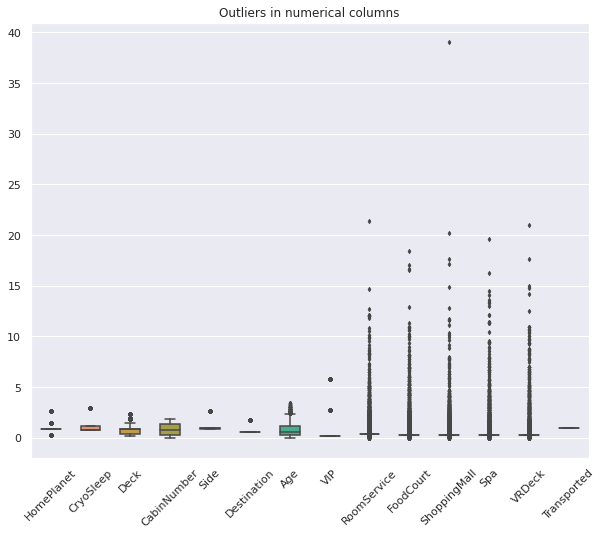

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt# Assuming z_scores is a dataframe containing z-scores of numerical columns

sns.set_palette(['red', 'orange', 'blue', 'green'])  # Set custom color palette
sns.set(rc={'figure.figsize':(10,8)})  # Set figure size

ax = sns.boxplot(data=z_scores, width=0.5, fliersize=3)
ax.set_title('Outliers in numerical columns')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()



In [ ]:
outliers_threshold = 3
mask = (z_scores <= outliers_threshold).all(axis=1)
print(f" No. of outlier rows = {len(mask[mask == False])} from total {df_scaled.shape[0]} rows")

 No. of outlier rows = 940 from total 8693 rows


**Observation:** From 6764 rows 703 rows are found to be outliers.

Let us remove these outliers.

In [ ]:
df_zscored = df_scaled[mask]
df_zscored.head()

,HomePlanet,CryoSleep,Deck,CabinNumber,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.333333,0.0,0.125,0.00000,0.0,0.666667,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.625,0.00000,0.5,0.666667,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,1.0
3,0.333333,0.0,0.000,0.00000,0.5,0.666667,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0
4,0.000000,0.0,0.625,0.00055,0.5,0.666667,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,1.0
5,0.000000,0.0,0.625,0.00000,0.0,0.333333,0.556962,0.0,0.000000,0.016201,0.000000,0.012986,0.000000,1.0


In [ ]:
df_zscored.shape

(7753, 14)

We now have 6061 rows of clean data


##**Visualising relation with label**

###Using Heatmap Correlation

The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

* 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

* 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

* -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

* 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

<AxesSubplot:>

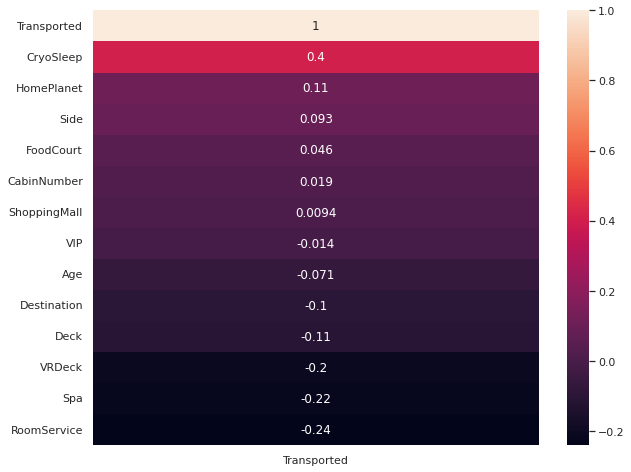

In [ ]:
# correlation matrix
corr = ((df_scaled.corr().iloc[:,-1]).sort_values(ascending=False)).to_frame()
sns.heatmap(corr, annot=True)
# df_scaled.corr().iloc[:,-1]

**Observation** : 
* There is a moderate positive relationship between 'CryoSleep' and 'Transported,' meaning that as the length of time spent in cryogenic sleep increases, the likelihood of being transported increases as well. 'CryoSleep' appears to be the best predictor of 'Transported,' with a moderate positive correlation.
* In contrast, there is a moderate negative relationship between 'RoomService' and 'Transported,' indicating that those who received room service are less likely to have been transported.
* Other variables that have a weak positive relationship with 'Transported' include 'HomePlanet' and 'Side.' Conversely, 'Deck,' 'Destination,' 'Age,' 'VIP,' 'Spa,' and 'VRDeck' all have weak negative relationships with 'Transported.'

#**Model Building**

In [ ]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split

X = df_zscored.drop('Transported', axis=1)
y = df_zscored['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##LogisticRegression

In [ ]:
metrics_table = list()
from sklearn.linear_model import LogisticRegression

# Create an instance of the model
logreg = LogisticRegression()

#Train the model on the training data
logreg.fit(X_train, y_train)

#Calculate predictions on Model
y_pred_logreg = logreg.predict(X_test)

#get the Performance metrics by method created above
metric_logreg = get_model_metrics(model_name="LogisticRegression", y_true=y_test, y_pred = y_pred_logreg)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_logreg)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_logreg, orient='index', columns=['Value'])

,Value
Model,LogisticRegression
Accuracy,0.754352
AUC,0.756993
Precision,0.801926
Recall,0.710976
F1,0.753717
Kappa,0.510461
MCC,0.514145


##DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the model
dt = DecisionTreeClassifier()

#Train the model on the training data
dt.fit(X_train, y_train)

#Calculate predictions on Model
y_pred_dt = dt.predict(X_test)

#get the Performance metrics by method created above
metric_dt = get_model_metrics(model_name="DecisionTreeClassifier", y_true=y_test, y_pred = y_pred_dt)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_dt)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_dt, orient='index', columns=['Value'])

,Value
Model,DecisionTreeClassifier
Accuracy,0.733075
AUC,0.733975
Precision,0.762953
Recall,0.718293
F1,0.73995
Kappa,0.466289
MCC,0.467184


##RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the model
rf = RandomForestClassifier()

#Train the model on the training data
rf.fit(X_train, y_train)

#Calculate predictions on Model
y_pred_rf = rf.predict(X_test)

#get the Performance metrics by method created above
metric_rf = get_model_metrics(model_name="RandomForestClassifier", y_true=y_test, y_pred = y_pred_rf)

#add metric to global list for conclusive evaluation
metrics_table.append(metric_rf)

#display metric dictionary in df
pd.DataFrame.from_dict(metric_rf, orient='index', columns=['Value'])



,Value
Model,RandomForestClassifier
Accuracy,0.787234
AUC,0.789575
Precision,0.831978
Recall,0.74878
F1,0.78819
Kappa,0.575646
MCC,0.578873


#**Model Evaluation**

In [ ]:
#To choose the best model let us display our conclusive metric
# highlight maximum value of each column
pd.DataFrame(metrics_table).style.highlight_max(axis=0)

,Model,Accuracy,AUC,Precision,Recall,F1,Kappa,MCC
0,LogisticRegression,0.754352,0.756993,0.801926,0.710976,0.753717,0.510461,0.514145
1,DecisionTreeClassifier,0.733075,0.733975,0.762953,0.718293,0.739950,0.466289,0.467184
2,RandomForestClassifier,0.787234,0.789575,0.831978,0.748780,0.788190,0.575646,0.578873


**Observation:** RandomForestClassifier	 performs as the best model for predicting the above data

**Reason:**
1. **Highest F1:** A high F1 score indicates that the model has both good precision and good recall, meaning that it is accurately identifying positive instances while minimizing false positives and false negatives. In other words, a high F1 score indicates that a model is effective at correctly identifying instances of a particular class.

2. **Highest AUC**: The higher the AUC score, the better the model's ability to correctly classify the positive and negative samples. 
It calibrates the trade-off between sensitivity and specificity at the best-chosen threshold. 
    Since, we care about true negatives as much as we care about true positives, it totally makes sense to choose high AUC.
3. **Highest MCC**: Since F1-score is asymmetric by not using True negatives at all, we use MCC. 
    A high MCC score indicates that the model has a strong overall performance,It means that the model is able to predict a high percentage of true positives and a high percentage of true negatives,on any balanced or imbalanced dataset. 
4. **Highest Accuracy**: (This is a win-win with other factors)
    With high accuracy, there is a high proportion of samples that are correctly classified.

###Visualize the best Model RandomForestClassifier's predictions

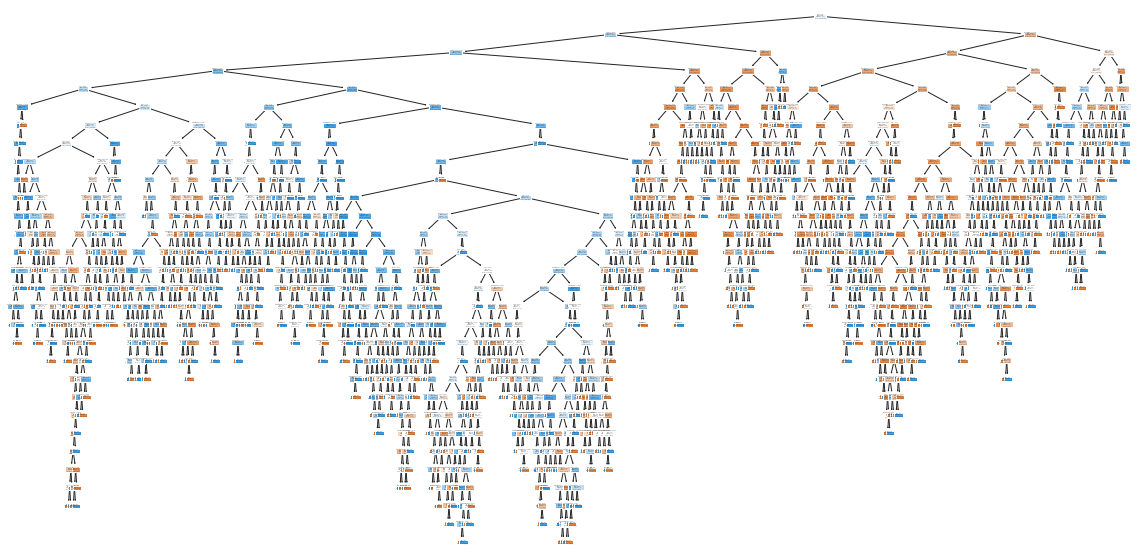

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# visualize the first decision tree in the random forest
plt.figure(figsize=(20,10))
plot_tree(rf.estimators_[0], feature_names=X_train.columns, filled=True)
plt.show()


#**Making Predictions on Test Data**

In [ ]:
#Calculate predictions on built Model of test data
y_pred_rf = rf.predict(df_test_scaled)

# create a new DataFrame from y_pred_rf with column name "Predicted to be Transported"
df_pred = pd.DataFrame(data=y_pred_rf, columns=["Pred_Transported"])
df_pred["Pred_Transported"] = np.where(df_pred["Pred_Transported"] == 1, True, False)

# concatenate df_test and df_pred column-wise
df_test_with_pred = pd.concat([df_test_copy.reset_index(drop=True), df_pred], axis=1).set_index('PassengerId')
df_test_with_pred

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Pred_Transported
PassengerId,,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,True
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,True
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,True
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,True
9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,True
9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,True


#**Reflection**

# **References**

[1] [Easiest way to download kaggle data in Google Colab](https://www.kaggle.com/general/74235)
